In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft

from ipywidgets import interact
from scipy import signal

# Task 1

Compare the spectra of a rectangle, Hann, Hamming and Blackman window.
(Hint:Think about a generalized cosine window first!)   
What is the spectrum for a triangular window?

In [3]:
N = 32
theta = np.r_[-np.pi:np.pi:2*np.pi/(N*8)]
n = np.r_[-5:N+5]

print(f'n: Number of data points in theta axis: start:{theta[0]}, end:{theta[-1]}, total:{len(theta)}')
print(f'n: Number of data points in time axis: start:{n[0]}, end:{n[-1]}, total:{len(n)}')

n: Number of data points in theta axis: start:-3.141592653589793, end:3.1170489609836016, total:256
n: Number of data points in time axis: start:-5, end:36, total:42


In [4]:
def make_window_plots(w, W, name='Window'):
    label_size, title_size  = 20, 25
    f, (ax_td, ax_fd) = plt.subplots(1, 2, figsize=(20, 5))
    for ax in (ax_td, ax_fd):
        ax.tick_params(axis='both', which='major', labelsize=label_size)

    # Plot the discrete time domain representation
    # of the window function
    ax_td.plot(n, w, 'o')
    ax_td.vlines(n, 0, w, lw=2, colors='C0')
    ax_td.set_xlim([n[0], n[-1]])
    ax_td.set_ylim([-0.1, 1.1])
    ax_td.set_xlabel(r'$n$', fontsize=label_size)
    ax_td.set_ylabel(r'$w(n)$', fontsize=label_size)
    ax_td.set_title('{} in time domain'.format(name),
                    fontsize=title_size)
    ax_td.axhline(c='k', lw=1.5, alpha=0.75)
    ax_td.grid(True)
    
    # Plot the spectral representation (in theta domain)
    ax_fd.plot(theta/(2*np.pi), 20*np.log10(np.abs(W)/np.max(np.abs(W))), lw=2)
    ax_fd.set_xlim([-0.5, 0.5])
    ax_fd.set_ylim([-80, 5])
    ax_fd.set_xlabel(r'$\theta/2\pi$', fontsize=label_size)
    fd_y_label = (r'$20\log\left(W\left(\mathrm{e}^{j\theta}'
                  r'\right)/N\right)/ \mathrm{dB}$')
    ax_fd.set_ylabel(fd_y_label, fontsize=label_size)
    ax_fd.set_title('{} in frequency domain'.format(name),
                    fontsize=title_size)
    ax_fd.axvline(c='k', lw=1.5, alpha=0.75)
    ax_fd.axhline(c='k', lw=1.5, alpha=0.75)
    ax_fd.grid(True)
    
    plt.show()

In [5]:
def generalized_cosine_window(n, N, c=[0.0, 0.0, 0.0]):
    w = np.sum([c_k*(-1)**k * np.cos(2*np.pi*k*n/(N-1))  # 3 REPLACE w = # TODO
                *(n < N)*(n >=0)
         for k, c_k in enumerate(c)], axis=0)
    return w

In [6]:
def dirichlet_spectrum(theta, N):
    spectrum =  (  # 4 REPLACE # TODO
        (theta != 0) * np.exp(-1j*(N-1)/2*theta)
                     * np.sin(theta*N/2)/np.sin(theta/2)
      + (theta == 0)*1.0)
    return spectrum

Defined as in the lecture. For more details, see [Wikipedia: Dirichlet kernel](https://en.wikipedia.org/wiki/Dirichlet_kernel)

In [7]:
def generalized_cosine_window_spectrum(theta, N, c=[0.0, 0.0, 0.0]):
    W = np.sum([c_k*(-1)**k * (  # 4 REPLACE W = # TODO
            dirichlet_spectrum(theta - k*2*np.pi/(N-1), N)
          + dirichlet_spectrum(theta + k*2*np.pi/(N-1), N)
       ) for k, c_k in enumerate(c)], axis=0)
    return W

## Rectangular window (often: Boxcar window)

In [8]:
c_rect = [1.0, 0.0]  # REPLACE c_rect = # TODO
w_rect = generalized_cosine_window(n, N, c_rect)  # REPLACE w_rect = # TODO
W_rect = generalized_cosine_window_spectrum(theta, N, c_rect) # REPLACE W_rect = # TODO

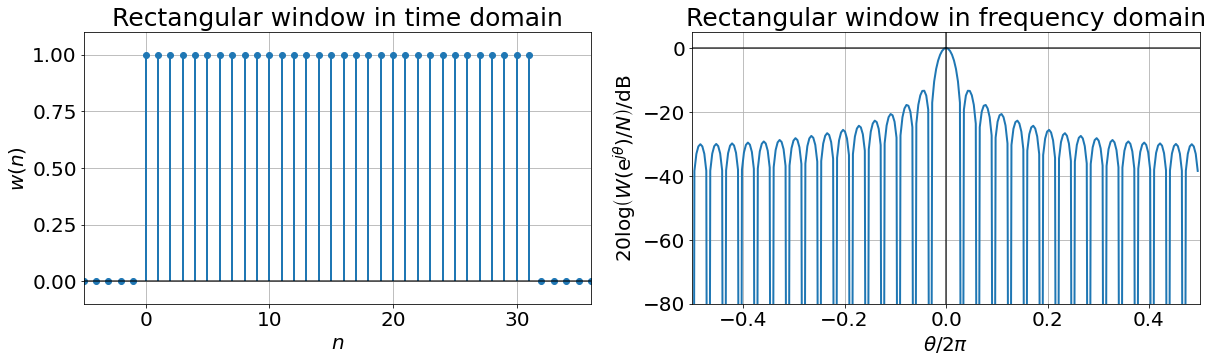

In [9]:
make_window_plots(w_rect, W_rect, name='Rectangular window')

## Hann window

In [10]:
c_hann = [0.5, 0.5]  # REPLACE c_hann = # TODO
w_hann = generalized_cosine_window(n, N, c_hann)  # REPLACE w_hann = # TODO
W_hann = generalized_cosine_window_spectrum(theta, N, c_hann) # REPLACE W_hann = # TODO

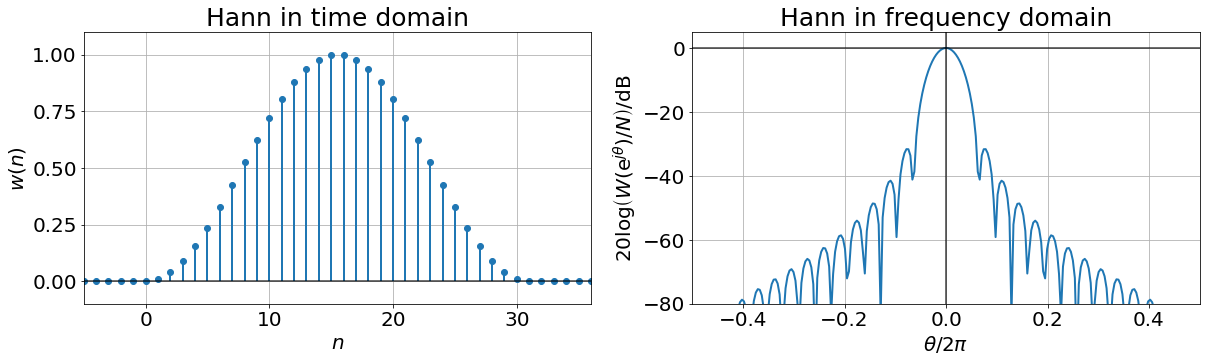

In [11]:
make_window_plots(w_hann, W_hann, 'Hann')

#### Remark:
This window is often referred to as *Hanning window*. This misconception (due to the fact that the window function is named after austrian meteorologist *Julius von Hann*) is rooted in the similarly named *Hamming window* (see below) and the fact that the inventors used the verb *hanning (a signal)* as shorthand for *applying the hann window function (to a signal)*.

## Hamming window

In [12]:
c_hamm = [0.54, 0.46]  # REPLACE c_hamm = # TODO
w_hamm = generalized_cosine_window(n, N, c_hamm)  # REPLACE w_hamm = # TODO
W_hamm = generalized_cosine_window_spectrum(theta, N, c_hamm)  # REPLACE W_hamm = # TODO

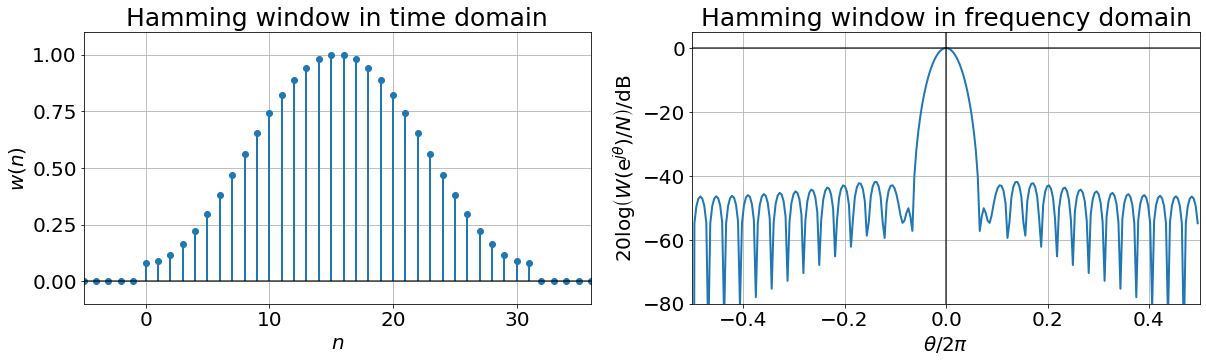

In [13]:
make_window_plots(w_hamm, W_hamm, name='Hamming window')

## Blackman window

In [14]:
alpha = 0.16
c_bm = [(1-alpha)/2, 1/2, alpha/2]  # REPLACE c_bm = # TODO
w_bm = generalized_cosine_window(n, N, c_bm)  # REPLACE w_bm = # TODO
W_bm = generalized_cosine_window_spectrum(theta, N, c_bm)  # REPLACE W_bm = # TODO

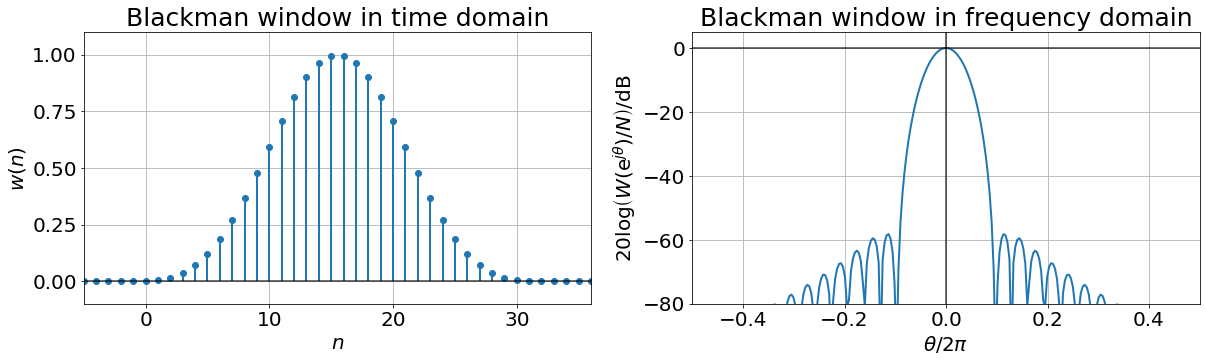

In [15]:
make_window_plots(w_bm, W_bm, name='Blackman window')

## Triangluar (or Bartlett) Window

In [16]:
def bartlett_window(n, N):
    return ( (1 - np.abs((n - (N-1)/2)/(N/2)))  # 2 REPLACE return # TODO
            *(n < N)*(n >=0))                   #also can be achieved by convolving two half length rect, script: ex-6.1

In [17]:
def bartlett_window_spectrum(theta, N):
    return (  # 4 REPLACE return # TODO
        (theta != 0) * np.exp(-1j*(N-1)/2*theta)
                     * (np.sin(theta*N/4)/np.sin(theta/2))**2
      + (theta == 0)*1.0)

In [18]:
w_bart = bartlett_window(n, N)  # REPLACE w_bart = # TODO
W_bart = bartlett_window_spectrum(theta, N)  # REPLACE W_bart = # TODO

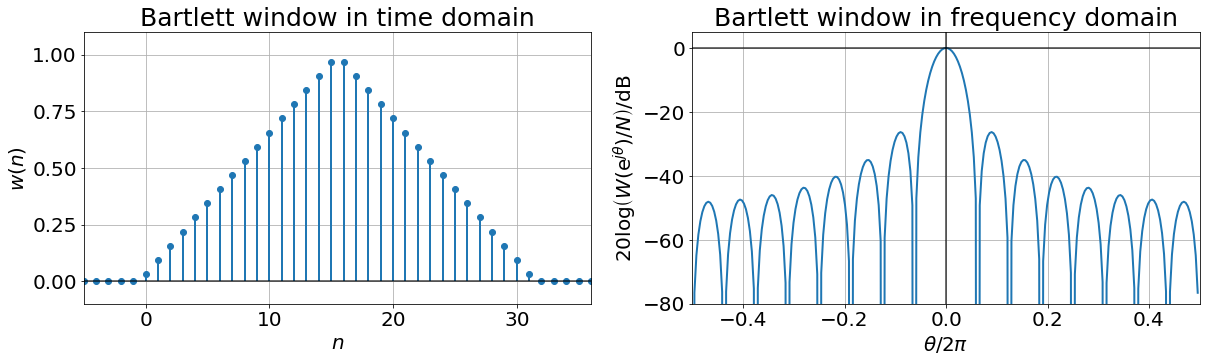

In [19]:
make_window_plots(w_bart, W_bart, name='Bartlett window')

# Task 2

Examine the leakage effect with Python. To this extend, approximate the continuous-time domain signals

\begin{align*}
    x_i(t) &= \mbox{rect} \left(\frac{t - T_M/2}{T_M}\right)\cdot\cos( 2\pi f_1 t),           &i \in \{1, 2\} \\
          &\approx x_i(m \cdot \Delta t)
\end{align*}

with a representation rate of $f_{rep} = 1/\Delta t = 16\,\mathrm{kHz}$    
and a measurement time of $T_M = 64\,\mathrm{ms}$.   
The rectangular window results from the finite measurement time $T_M$.

## Part I: (EX - 6.3.1)
At first, the frequency is given as $f_1 = \frac{4}{T_M}$.

In [35]:
f_rep  = 16000     # REPLACE f_rep = # TODO  Hz (representation rate for pseudo continuous-time signal)
T_M = 0.064        # REPLACE T_M = # TODO s (measurement time)

# distance between representation points
delta_t  = 1/f_rep

# Number of points in measured signal
M = int(np.round(T_M*f_rep))

# time axis
t = np.arange(M)*delta_t # s

# sampling rate for discrete-time signal
f_s = 500  #given in 6.3.1      # REPLACE f_s = # TODO Hz

print(f'len of M: {M}')

len of M: 1024


1) Define the signal $x_1(t)$ here:

In [36]:
f_1 = 4/T_M

x_1_t = np.cos(2*np.pi*f_1*t)  # REPLACE # TODO

Now acquire the time-discrete signal 

\begin{align}
    x_i(n) = x_i(n \cdot T_\mathrm{s}) = \left. x_i(t)\right|_{t = n \cdot T_\mathrm{s}}
\end{align}

by sampling with the sampling rate $f_\mathrm{s} = 500\mathrm{Hz}$. (as mentioned in 6.3, 1.) 

To solve this, first find out the step size $N_\mathrm{s}$ between points taken from $x_1(m \cdot \Delta_t)$.

In [37]:
N_s = int(np.round(f_rep/f_s))    # step size between samples in x_1_t
N = int(f_s*T_M)                 # Number of samples taken in total

x_1_n = x_1_t[::N_s]  # REPLACE x_1_n = # TODO

assert len(x_1_n) == N

print(f'len of M: {N}')

len of M: 32


Plot $x_1(t)$ and $x_1(n \cdot T_s)$ together in a single figure:

In [24]:
def plot_time_domain(x_t, x_n,
                     y_label=(r'$x(t),\quad x(n \cdot T_\mathrm{s})$'),
                     name='Signal'):
    t_samp = np.arange(len(x_n))*1/f_s
    
    plt.figure(figsize=(20, 5))
    label_size, title_size  = 20, 25

    plt.plot(t, x_t, lw=4, color='C0')
    plt.plot(t_samp, x_n, 'o', ms= 10, color='C1')
    plt.vlines(t_samp, 0, x_n, color='C1')

    plt.xlim((t[0], t[-1]))
    plt.xlabel(r'$t / \mathrm{s}$', fontsize=label_size);
    plt.ylabel(y_label, fontsize=label_size)
    plt.gca().tick_params(axis='both', which='major', labelsize=label_size)
    plt.title(name, fontsize=title_size)
    
    plt.axhline(c='k', alpha=0.75)
    plt.grid(True)

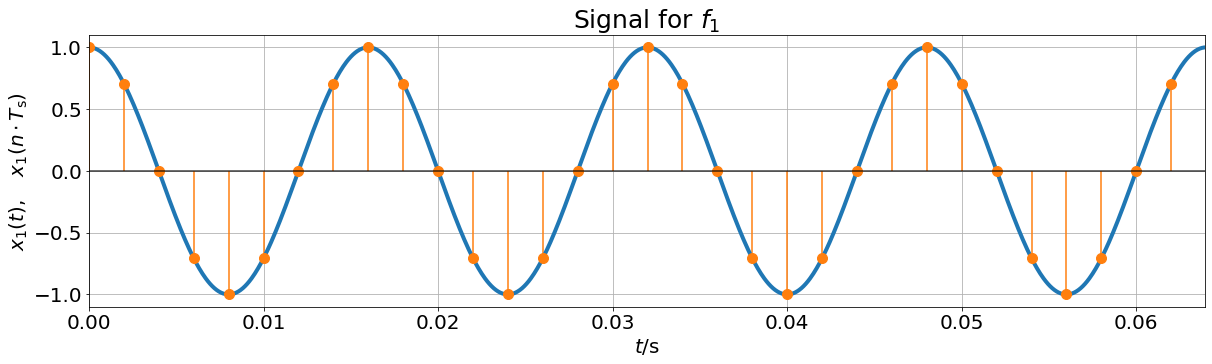

In [25]:
plot_time_domain(x_1_t, x_1_n,  # REPLACE plot_time_domain(..., 
                 y_label=r'$x_1(t),\quad x_1(n \cdot T_\mathrm{s})$',  # COMMENT
                 name=r'Signal for $f_1$')  # COMMENT

2) Calculate the magnitude of $\mathrm{FFT}_M\left\{x_{1}(n)\right\}$ and $\mathrm{FFT}_N\left\{x_{1}(n)\right\}$:

In [47]:
X_1_M_abs = np.abs(fft(x_1_n, M))  # REPLACE X_1_M_abs = # TODO
X_1_N_abs = np.abs(fft(x_1_n, N))  # REPLACE X_1_N_abs = # TODO

print(f'lenth of X_1_M_abs: {len(X_1_M_abs)}')
print(f'lenth of X_1_N_abs: {len(X_1_N_abs)}')

lenth of X_1_M_abs: 1024
lenth of X_1_N_abs: 32


Plot the spectra together in one diagram:

In [50]:
def plot_spectral_domain(X_M_abs, X_N_abs, 
                         y_label=(r'$|X(\mathrm{e}^{j\theta})|,'
                                   '|X(\mathrm{e}^{j\theta_k})|$'),
                         name='Spectrum'):
    plt.figure(figsize=(20, 5))
    label_size, title_size  = 20, 25

    theta = 2*np.pi*np.arange(M)/M
    N_s = M//len(X_N_abs)
    theta_k = theta[::N_s]

    plt.plot(theta/(2*np.pi), X_M_abs, lw=4, alpha=0.5)
    plt.plot(theta_k/(2*np.pi), X_N_abs, 'o', ms= 10, color='C1') #points
    plt.vlines(theta_k/(2*np.pi), 0, X_N_abs, lw=2.5, color='C1') #amplitude lines

    plt.xlim([0, 1])

    plt.xlabel(r'$\theta / 2 \pi$', fontsize=label_size)
    plt.ylabel(y_label, fontsize=label_size)
    plt.gca().tick_params(axis='both', which='major', labelsize=label_size)
    plt.title(name, fontsize=title_size)

    plt.axhline(c='k', alpha=0.75)
    plt.grid(True)

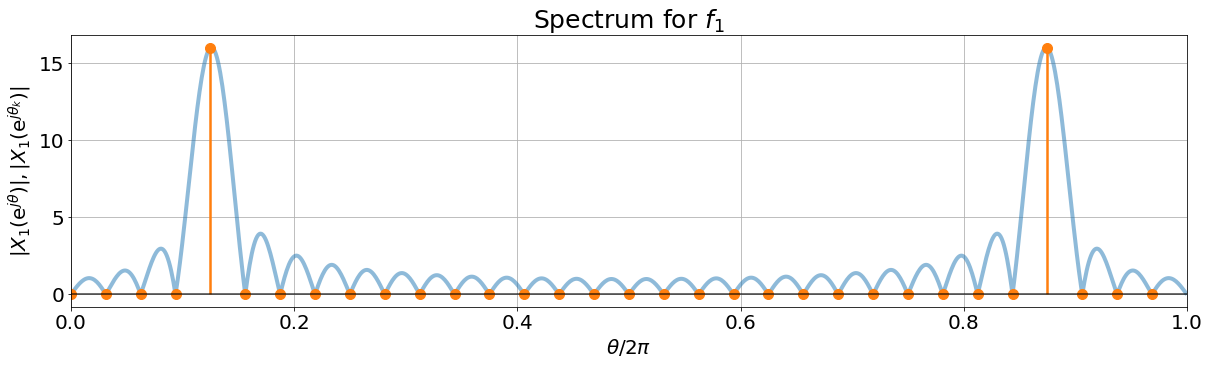

In [51]:
plot_spectral_domain(X_1_M_abs, X_1_N_abs,  # REPLACE plot_spectral_domain(..., 
                     y_label=(r'$|X_1(\mathrm{e}^{j\theta})|,'  # COMMENT
                              r'|X_1(\mathrm{e}^{j\theta_k})|$'),  # COMMENT
                     name=r'Spectrum for $f_1$')  # COMMENT

## Part II:
Now look at $x_2(t)$ for $f_2 = \frac{4.372}{T_M}$ 

1) Define the signal $x_2(t)$ here:

In [38]:
f_2 = 4.2/T_M
x_2_t = np.cos(2*np.pi*f_2*t)  # REPLACE # TODO

Acquire the time-discrete signal $x_2(n)$ by means of sampling as above:

In [39]:
x_2_n = x_2_t[::N_s]  # REPLACE # TODO

Plot both time-domain signals in one figure:

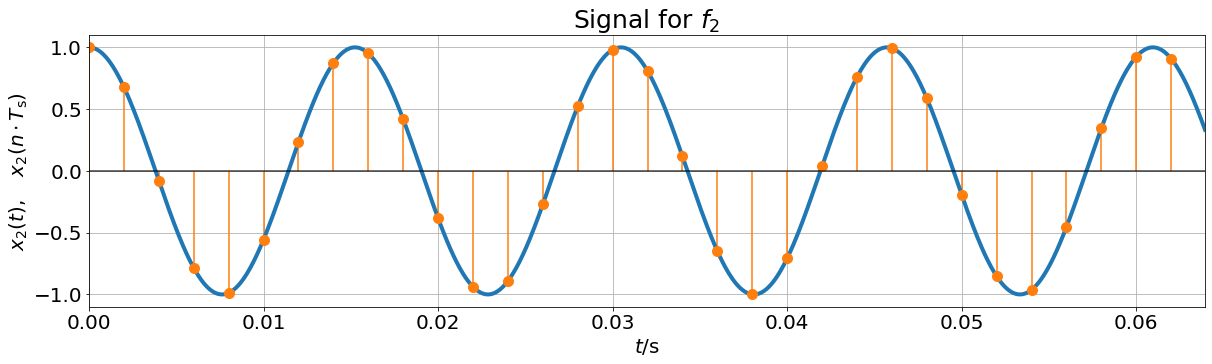

In [40]:
plot_time_domain(x_2_t, x_2_n,  # REPLACE plot_time_domain(...,
                 y_label=r'$x_2(t),\quad x_2(n \cdot T_\mathrm{s})$',  # COMMENT
                 name=r'Signal for $f_2$')  # COMMENT

2) Calculate the magnitude of $\mathrm{FFT}_M\left\{x_{2}(n)\right\}$ and $\mathrm{FFT}_N\left\{x_{2}(n)\right\}$;

In [41]:
X_2_M_abs = np.abs(fft(x_2_n, M))  # REPLACE X_2_M_abs = # TODO
X_2_N_abs = np.abs(fft(x_2_n, N))  # REPLACE X_2_N_abs = # TODO

Plot the spectra together in one diagram:

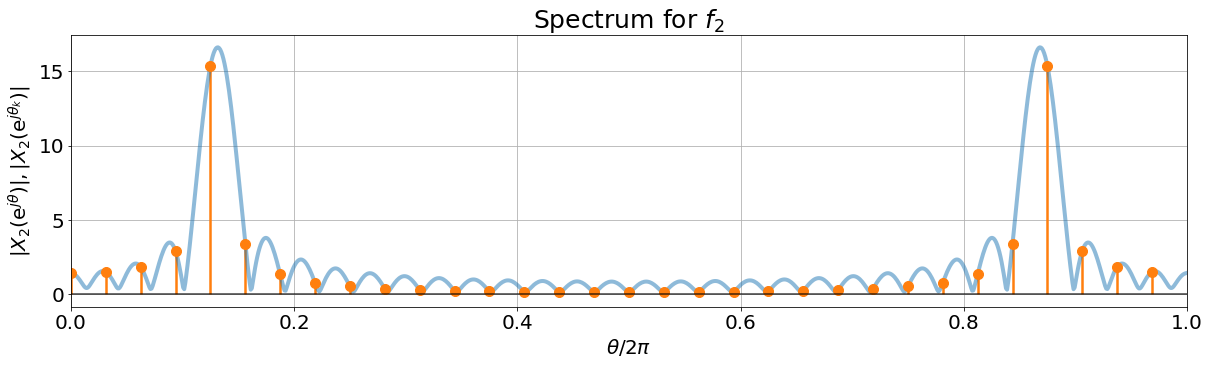

In [42]:
plot_spectral_domain(X_2_M_abs, X_2_N_abs,  # REPLACE plot_spectral_domain(..., 
                     y_label=(r'$|X_2(\mathrm{e}^{j\theta})|,'  # COMMENT
                              r'|X_2(\mathrm{e}^{j\theta_k})|$'),  # COMMENT
                     name=r'Spectrum for $f_2$')  # COMMENT

# Task 3
Double the length of $x_2(nT)$ by apending zeros. What can you observe in the frequency domain?

In [43]:
X_2_N_abs_pad = np.abs(fft(x_2_n, 2*N))

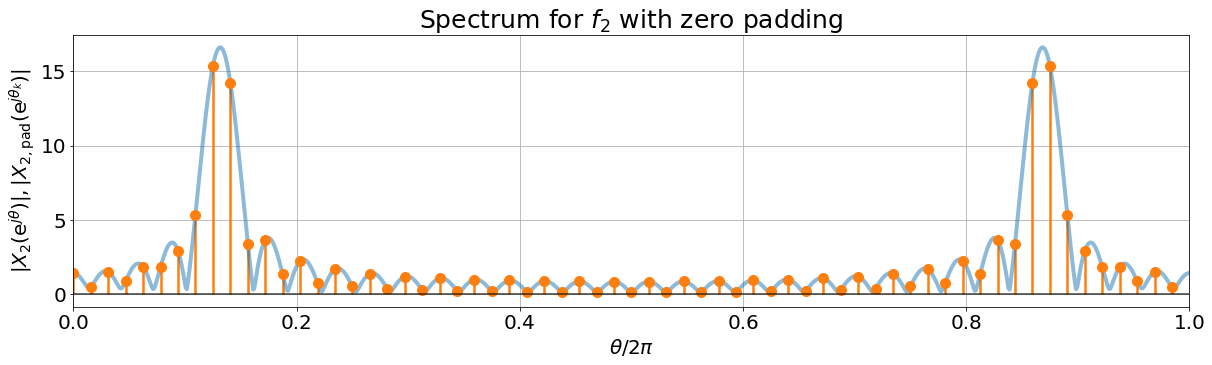

In [44]:
plot_spectral_domain(X_2_M_abs, X_2_N_abs_pad,  # REPLACE plot_spectral_domain(..., 
                     y_label=(r'$|X_2(\mathrm{e}^{j\theta})|,'  # COMMENT
                              r'|X_{2,\mathrm{pad}}(\mathrm{e}^{j\theta_k})|$'),  # COMMENT
                     name=r'Spectrum for $f_2$ with zero padding')  # COMMENT

Note: So when we increasing the observation time in time domain, frequency resolution is getting better.

# Task 4:
Compare the effect of different window functions on the result for $X_2(k)$. You can use the functions from `scipy.signal`.

In [46]:
@interact(window_name=['boxcar', 'triangular', 
                  'blackman', 'hamming',
                  'hann', 'bartlett'], pad_exp=(0, 3))
def plot_windowed_spectrum(window_name, pad_exp):
    window = signal.get_window(window_name, N)  # 6 REPLACE # TODO
    X_2_N_abs_windowed_pad = np.abs(fft(x_2_n * window, 2**pad_exp*N))
    plot_spectral_domain(X_2_M_abs, X_2_N_abs_windowed_pad,
                         y_label=(r'$|X_2(\mathrm{e}^{j\theta})|$,'
                                  r'$|X_{2,\mathrm{pad}}(\mathrm{e}^{j{\theta}_k})|$'),
                         name=r'Spectrum for $f_2$ with zero padding')
    plt.show();

interactive(children=(Dropdown(description='window_name', options=('boxcar', 'triangular', 'blackman', 'hammin…